## This projet shows how to handle missing data in the .csv data file, and shows how one can visualize data by handling .csv data file. 2018 weather data of Death Valley, CA, USA has been visualized.
### See the 'death_valley_2018_simple.csv' data file for more details

### The source of the data is : https://www.ncdc.noaa.gov/cdo-web/.


Missing data corresponding to the date of 2018-02-18 00:00:00


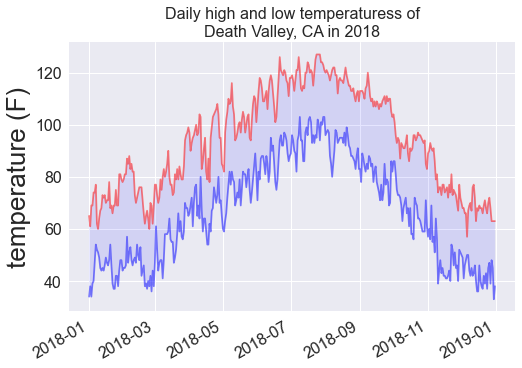

In [13]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

filename = 'data/death_valley_2018_simple.csv'

with open(filename) as f:
	reader = csv.reader(f)
	header_row = next(reader)

	# now  we get the max temp values
	highs = []
	lows = []
	dates = []
	for row in reader:
		current_date = datetime.strptime(row[2], '%Y-%m-%d')
		try:
			high = int(row[4])
			low = int(row[5])
		except ValueError:
			print("Missing data corresponding to the date of {}".format(current_date))
		else:
			highs.append(high)
			lows.append(low)
			dates.append(current_date)
		

# lets plot the high temperatures
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, c = 'red', alpha = 0.5)
ax.plot(dates, lows, c = 'blue', alpha = 0.5)
ax.fill_between(dates, highs, lows, facecolor = 'blue', alpha = 0.1)

#Format the plot
ax.set_title("Daily high and low temperaturess of\nDeath Valley, CA in 2018", fontsize = 16)
ax.set_xlabel('', fontsize = 26)
ax.set_ylabel('temperature (F)', fontsize = 26)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
fig.autofmt_xdate()
plt.show()
